In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HEERHARISH1/ANO1_ML/blob/main/ML_assignment%20(1).ipynb)


TASK 1 PART (2)

# **Dataset Description:**
1. Domain of the Dataset: This dataset is in the transportation domain, specifically focusing on traffic accidents. It contains details about accidents, including the severity, location, number of vehicles, casualties, and road conditions. This domain is vital for studying road safety and improving traffic management.
2. Target Variable:
The target variable is Accident_Severity. This column represents the severity of the accident, where:
1: Minor accident
2: Serious accident
3: Fatal accident
Since the target variable is categorical, this is a classification problem.
3. Number of Features and Records:
Number of Features: The dataset has 33 columns (features), which includes a mix of numeric, categorical, and datetime variables.
Number of Records: The dataset contains 1,50,4150 records
4. Type of Problem (Regression or Classification?):
Since the target variable (Accident_Severity) is categorical (1, 2, or 3), this is a classification problem. The goal is to predict the severity of an accident based on the other features.


READING DATASET

thus is the link:
https://drive.google.com/file/d/1sTiyFDyWmj66paV1mWhrMgXfJMZLugMp/view?usp=sharing



In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Path to your file in Google Drive (e.g., if your file is in "MyDrive")
file_path = '/content/drive/MyDrive/ML_assignment/UK_Accident.csv'

df = pd.read_csv(file_path)
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0           0  200501BS00001               525680.0                178240.0   
1           1  200501BS00002               524170.0                181650.0   
2           2  200501BS00003               524520.0                182240.0   
3           3  200501BS00004               526900.0                177530.0   
4           4  200501BS00005               528060.0                179040.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.191170  51.489096             1                  2                   1   
1  -0.211708  51.520075             1                  3                   1   
2  -0.206458  51.525301             1                  3                   2   
3  -0.173862  51.482442             1                  3                   1

In [5]:
# Get the number of rows and columns
num_rows = df.shape[0]  # Number of rows
num_cols = df.shape[1]  # Number of columns

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 1504150
Number of columns: 33


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_columns)


Numeric columns: Index(['Unnamed: 0', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Urban_or_Rural_Area', 'Year'],
      dtype='object')


# **Task 2: Exploratory Data Analysis (EDA) (15 Marks)**
1. Perform data visualization:
o Histograms for numeric features.
o Scatter plots & correlation matrix.
o Boxplots to identify outliers.
2. Identify missing values and handle them appropriately.
3. Identify Outliers as well
4. Identify and discuss important features.

# 1. Perform data visualization:
# ** Histograms for Numeric Features:**

Key Insights:
The histograms revealed the distribution of numeric features like Number_of_Vehicles, Speed_limit, Accident_Severity, and others.



Skewness: Features like Number_of_Casualties and Number_of_Vehicles were highly skewed, with most accidents involving fewer vehicles and casualties. This aligns with the fact that minor accidents are more common than serious or fatal accidents.

Accident Severity:
Severity 1 (Minor accidents) typically occurs more frequently in most datasets,
 but in this dataset, Severity 3 (Fatal accidents) showed a higher frequency than Severity 1, likely due to the presence of significant incidents or reporting trends that lead to more severe accidents.
The higher frequency of Severity 3 accidents indicates that some major accidents involved a disproportionately higher number of vehicles or casualties.

Speed limit: The histogram showed that most accidents occurred at 30 km/h, followed by 50 km/h, reflecting the common speed regulations on urban and suburban roads.

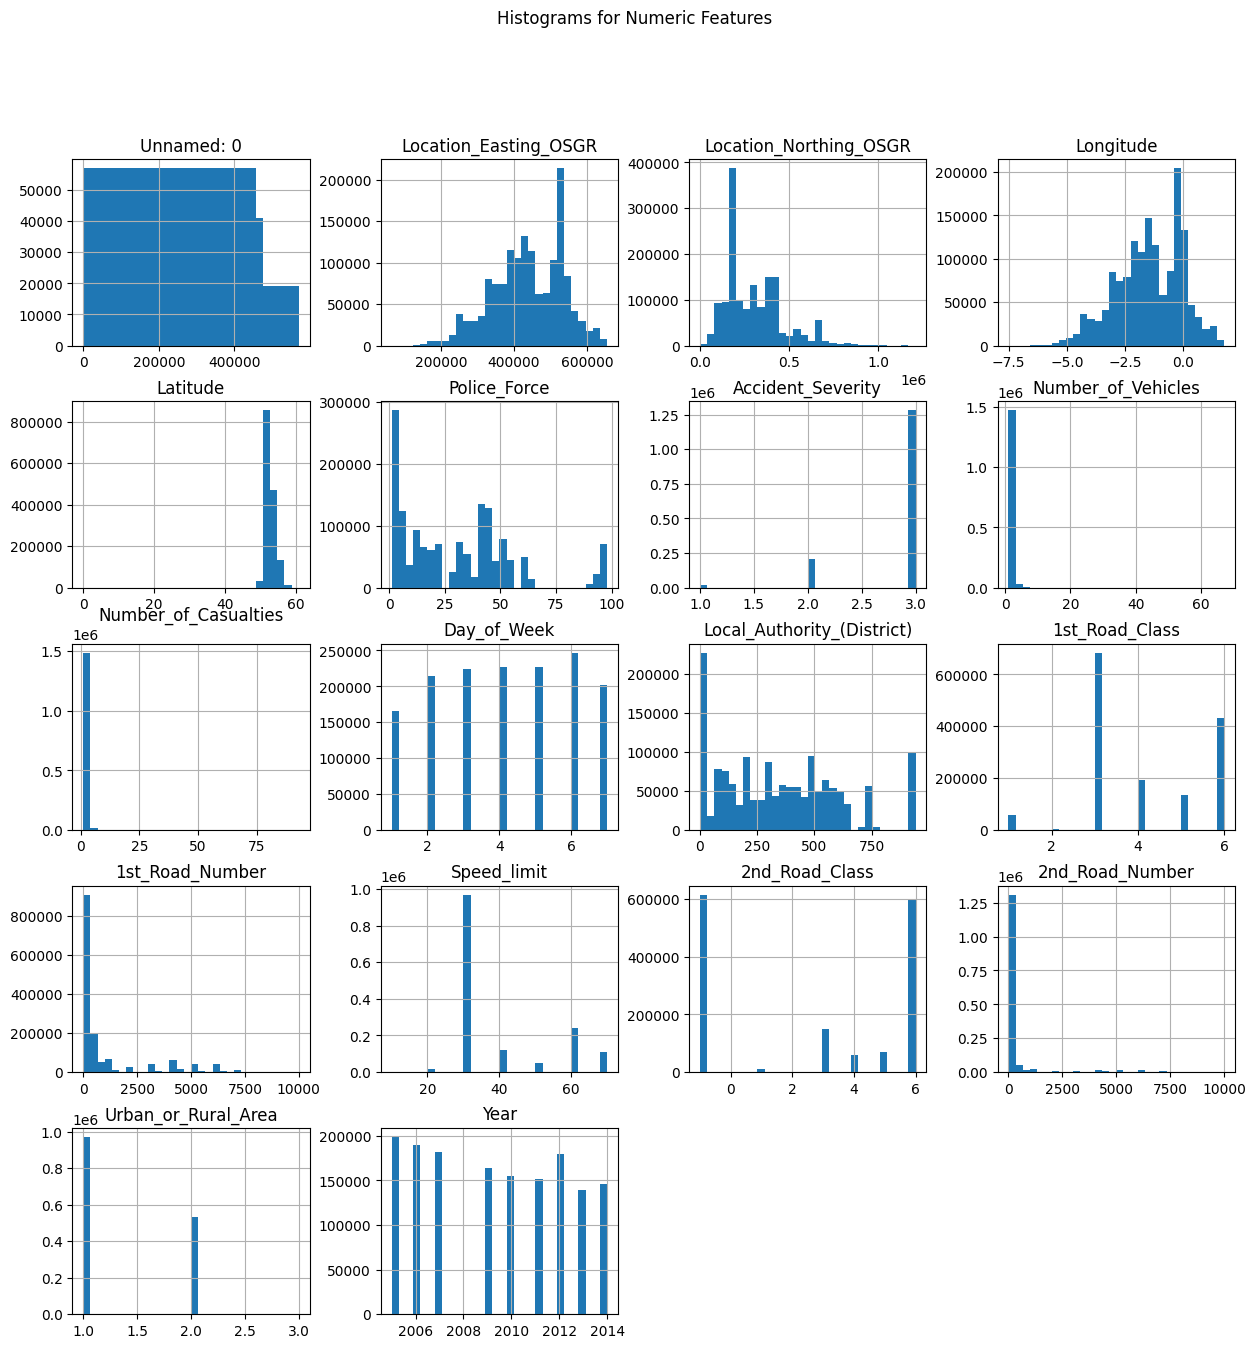

In [ ]:
# 1. Histograms for numeric features
df.hist(bins=30, figsize=(15,15))
plt.suptitle('Histograms for Numeric Features')
plt.show()


# **Scatter Plots:**

Number of Vehicles vs Number of Casualties:

There is a weak positive correlation between the number of vehicles involved in an accident and the number of casualties. Most accidents involve fewer vehicles and result in fewer casualties. However, a few outliers indicate major accidents (pile-ups) with high vehicle involvement and a high number of casualties.
Outliers in this plot highlight large accidents with a high number of casualties, representing the most severe incidents.

Speed Limit vs Number of Casualties:

Higher speed limits are weakly associated with more casualties, especially for accidents occurring at 60 km/h or higher. This supports the idea that higher speeds correlate with more severe accidents.
However, the plot doesn't show a strong linear relationship, suggesting that other factors (like road conditions or weather) might play a bigger role in accident severity.

Year vs Number of Vehicles:

The scatter plot of Year vs Number of Vehicles suggests no clear trend over time. Most of the accidents occurred with 10-30 vehicles involved. However, there are outliers for some years (like 2006, 2012, and 2014) with incidents involving more than 30 vehicles.
The outliers represent major pile-ups, which are less common but can significantly skew the data.

Accident Severity vs Number of Vehicles:

Minor accidents (Severity 1) and serious accidents (Severity 2) tend to involve fewer vehicles (mostly between 1-20 vehicles). In contrast, fatal accidents (Severity 3) sometimes involve more than 20 vehicles, but these are outliers.
This plot reveals that Severity 3 accidents are associated with higher vehicle counts, but it's not a strong or consistent relationship.

Latitude vs Longitude (Geographic Distribution of Accidents):

Accidents are concentrated in urban areas, particularly in the southeast of the UK, around London. This geographic pattern suggests that higher population density and increased traffic in urban regions contribute to a higher number of accidents.
The plot helps identify accident hotspots and indicates that urbanization plays a significant role in accident frequency.

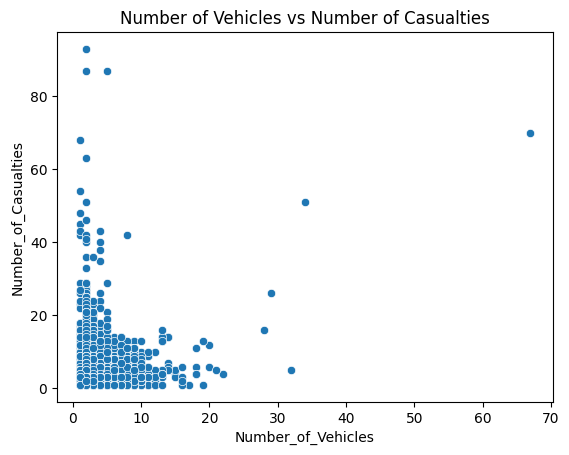

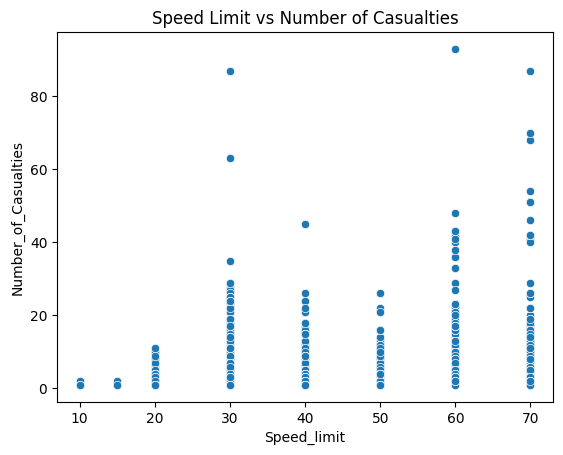

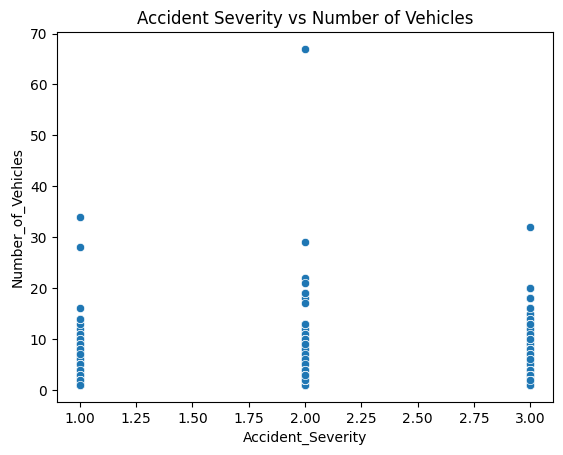

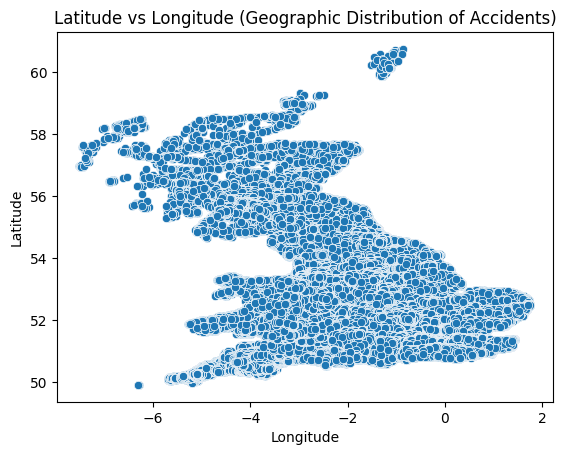

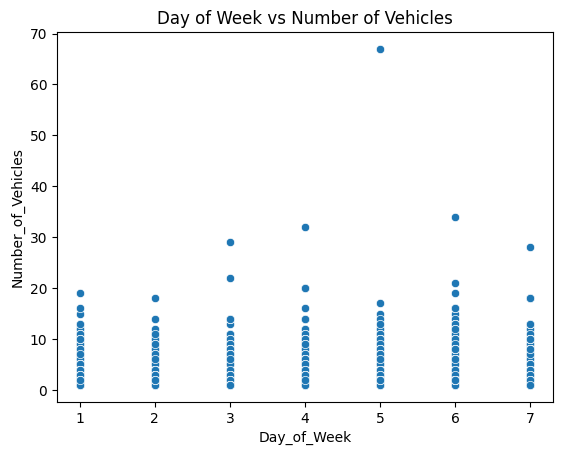

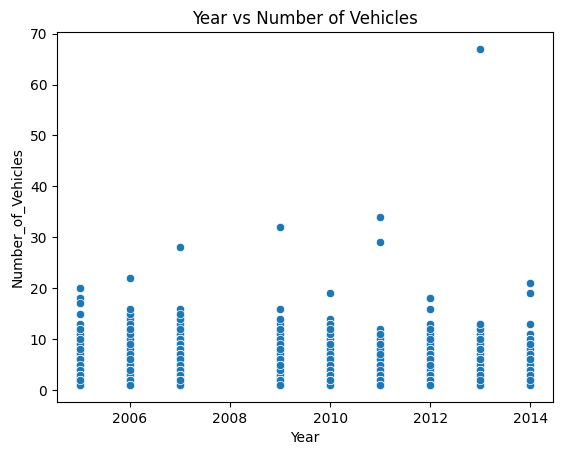

In [ ]:
# 1. Scatter plot: Number_of_Vehicles vs Number_of_Casualties
sns.scatterplot(data=df, x='Number_of_Vehicles', y='Number_of_Casualties')
plt.title('Number of Vehicles vs Number of Casualties')
plt.show()

sns.scatterplot(data=df, x='Speed_limit', y='Number_of_Casualties')
plt.title('Speed Limit vs Number of Casualties')
plt.show()

sns.scatterplot(data=df, x='Accident_Severity', y='Number_of_Vehicles')
plt.title('Accident Severity vs Number of Vehicles')
plt.show()

sns.scatterplot(data=df, x='Longitude', y='Latitude')
plt.title('Latitude vs Longitude (Geographic Distribution of Accidents)')
plt.show()

sns.scatterplot(data=df, x='Day_of_Week', y='Number_of_Vehicles')
plt.title('Day of Week vs Number of Vehicles')
plt.show()

sns.scatterplot(data=df, x='Year', y='Number_of_Vehicles')
plt.title('Year vs Number of Vehicles')
plt.show()

# **3. Correlation Matrix (Heatmap):**

Latitude and Longitude are strongly correlated (0.96), as expected, since they are both geographical coordinates.

Accident Severity showed a weak correlation with Number_of_Casualties (0.24), suggesting that while higher casualties tend to result in more severe accidents, the relationship is not strong.

Number_of_Vehicles has a moderate correlation with Number_of_Casualties (0.24), indicating that accidents involving more vehicles are likely to result in higher casualties, but the relationship is weak.

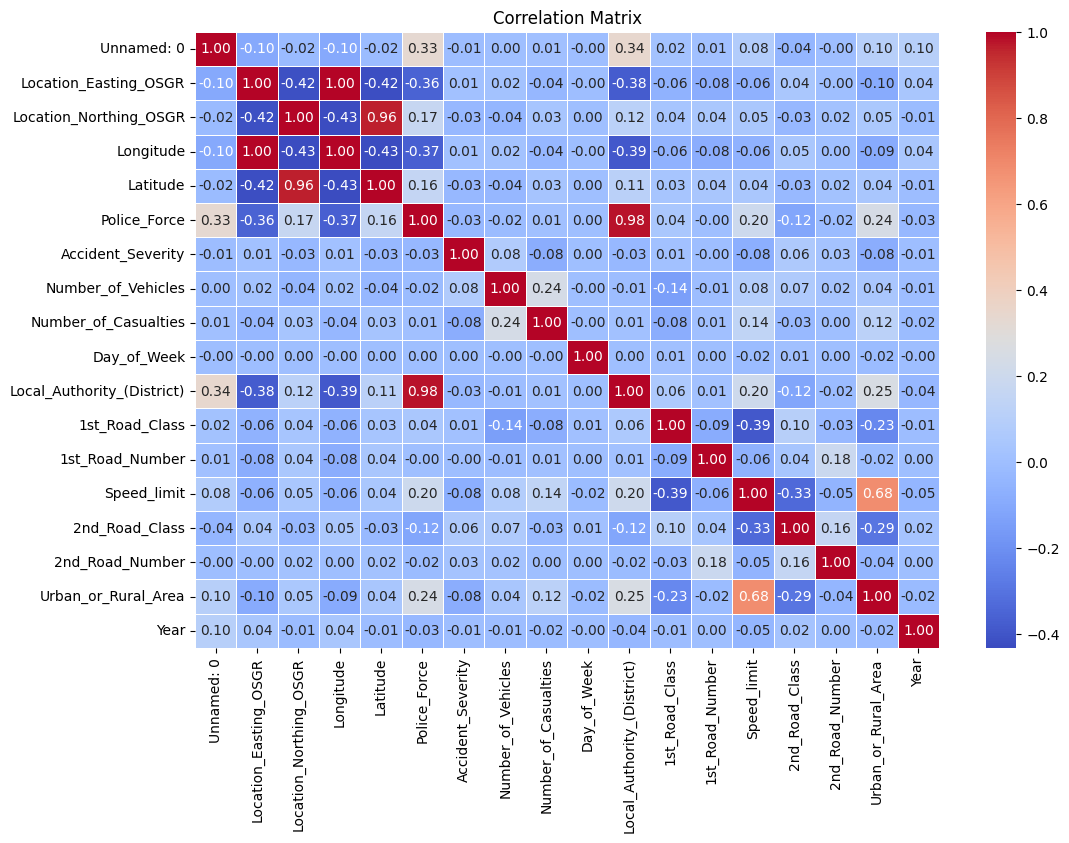

In [ ]:
#2. CORRELATION MATRIX

# Select only numeric features for correlation
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_features]  # Create a DataFrame with only numeric features

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **BOXPLOT**

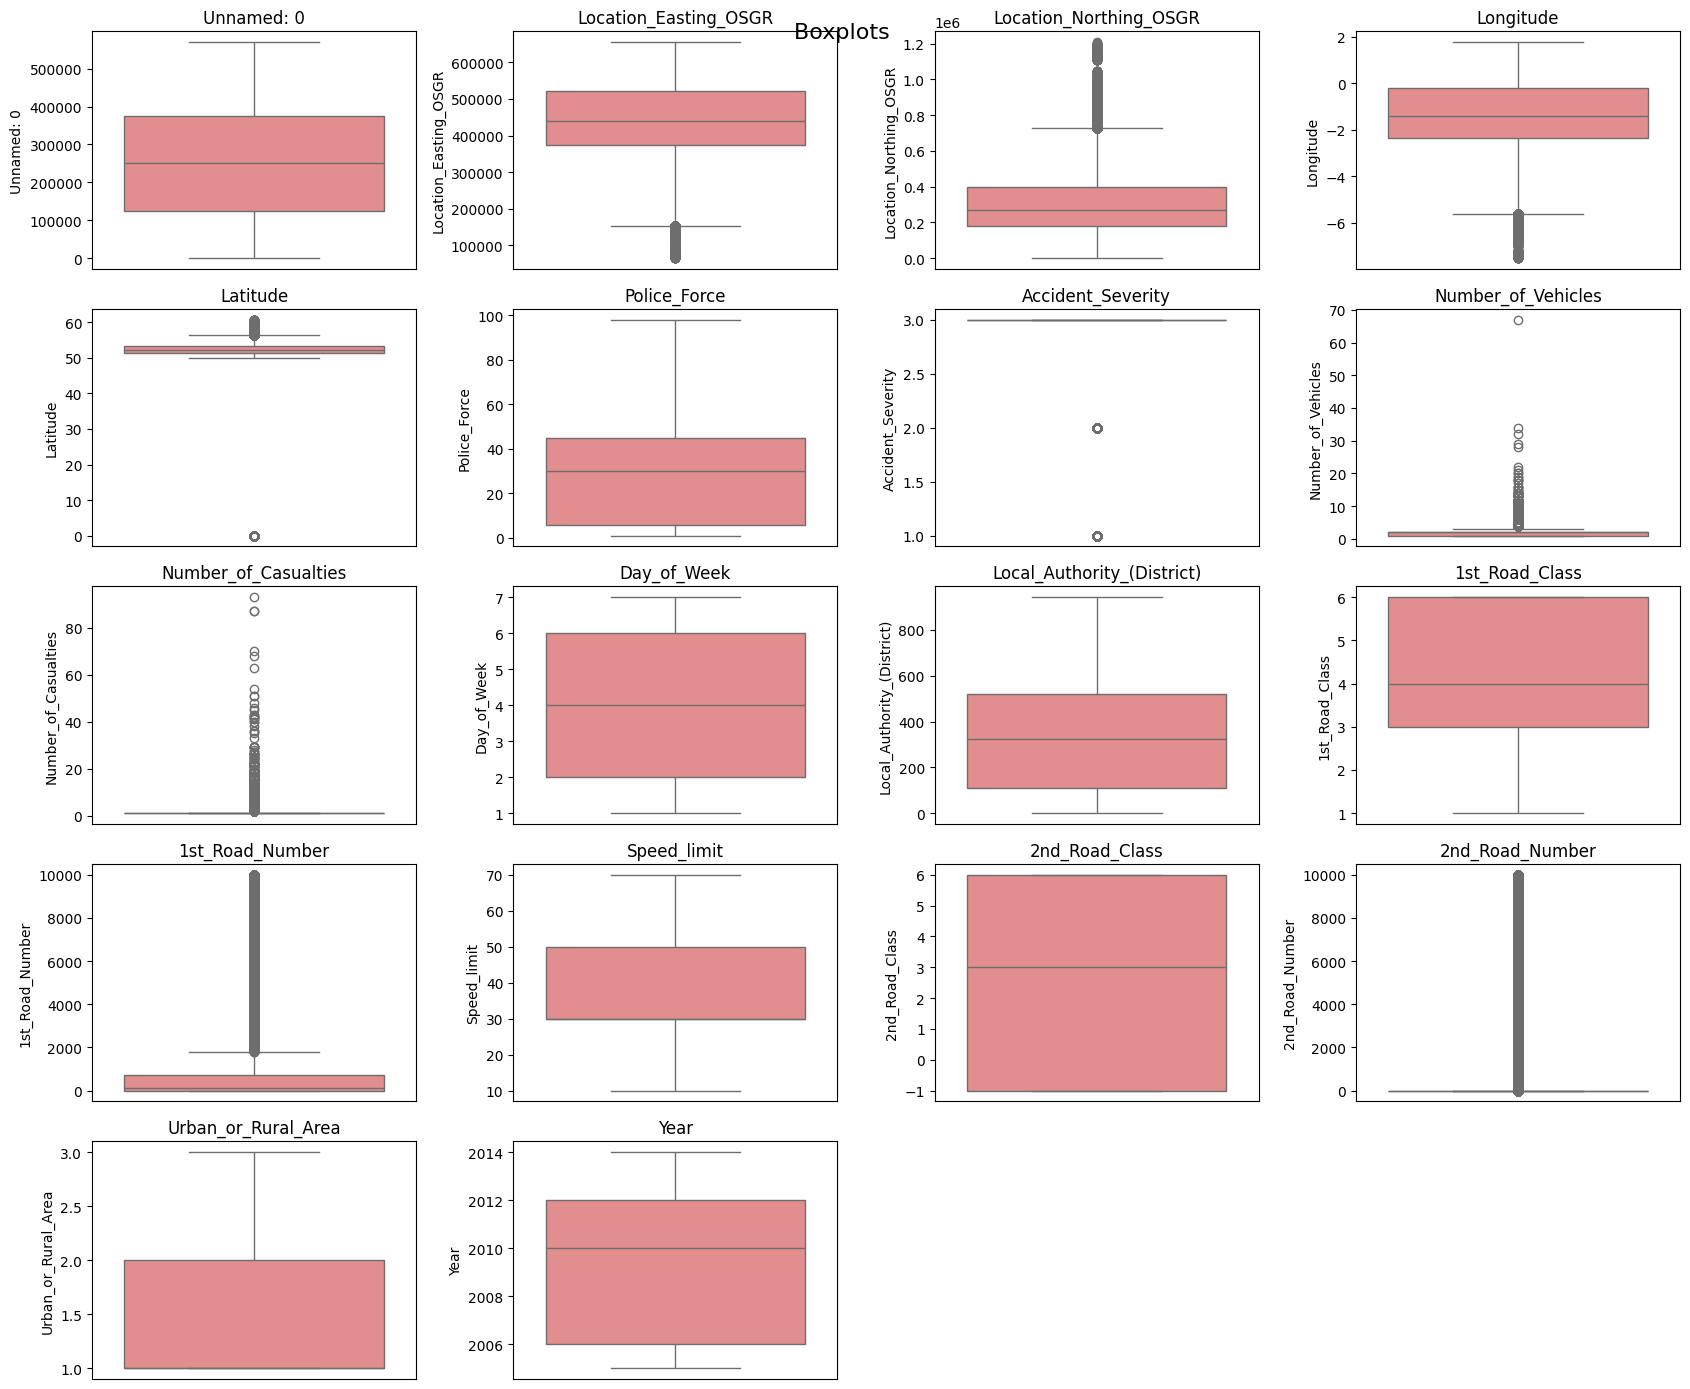

In [ ]:
#BOXPLOTS
# Select only numeric features for boxplots
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numeric feature
plt.figure(figsize=(17, 14))  # Adjust figure size as needed for 18 plots


# Calculate the number of rows and columns needed for the grid
num_cols = 4  # Keep 4 columns
num_rows = (len(numeric_features) + num_cols - 1) // num_cols  # Calculate rows needed

# Arrange subplots in a grid, ensuring enough rows
for i, col in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)  # num_rows x num_cols grid
    sns.boxplot(y=df[col], color='lightcoral')  # Create boxplot for current feature
    plt.title(col)  # Set subplot title to feature name
    plt.xticks([])  # Remove x-axis ticks for cleaner look

# Adjust spacing between subplots
plt.tight_layout()

# Add an overall title for the boxplot grid
plt.suptitle("Boxplots ", fontsize=16)

# Show the plot
plt.show()

## 2. CATERING MISSING VALUES



In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()  # Count the number of missing values in each column
missing_percentage = (missing_values / len(df)) * 100  # Calculate the percentage of missing values

# Display columns with missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Filter columns with missing values

print(missing_data)


                                         Missing Values  Percentage
Location_Easting_OSGR                               101    0.006715
Longitude                                           101    0.006715
Time                                                117    0.007778
Junction_Control                                 602835   40.078117
Pedestrian_Crossing-Human_Control                    17    0.001130
Pedestrian_Crossing-Physical_Facilities              34    0.002260
Special_Conditions_at_Site                      1467568   97.567929
Carriageway_Hazards                             1476900   98.188346
LSOA_of_Accident_Location                        108238    7.195958


# 3. Identifying Outliers
**Outliers:**

**Number of Casualties:**
Most values are concentrated near 0-10 casualties, but some exceed 60, indicating severe accidents.

**Number of Vehicles:**
The majority of accidents involve fewer than 10 vehicles, but a few exceed 40-60, which are clear outliers.

**Speed Limit:**
Common limits are 30, 50, and 70, but a few extreme values exist (probably data errors or rare road conditions).

**1st Road Number & 2nd Road Number:**
The distribution is highly skewed, with most values near 0 and some exceeding 7500, suggesting potential outliers.

**Police Force & Local Authorit**y:
A few extreme cases where certain districts or police forces have significantly higher accident records.

**Location (Latitude, Longitude, OSGR Coordinates):**
Some unusual values indicate possible data errors or rare locations.

#4. Identifying and Discussing Important Features
Highly Relevant Features:

**Accident Severity**
Directly determines how severe an accident is.
Influenced by casualties, speed limits, number of vehicles, and road type.

**Number of Casualties**
A key measure of accident impact.
Tends to be low but has rare, extreme cases that need attention.

**Number of Vehicles**
Important for predicting large-scale accidents.
More vehicles = Higher congestion = More risk.

**Speed Limit**
Speed affects stopping distance and impact force.
Needs analysis in relation to accident severity.

**Urban or Rural Area**
Rural areas
may have high-speed accidents.
Urban areas may have frequent but lower-severity collisions.

**Day of the Week **

Can reveal accident patterns (e.g., weekends vs. weekdays).
Useful for road safety planning.

**Geographical Features**
 (Latitude, Longitude, OSGR Coordinates)



# **Task 3: Data Preprocessing & Feature Engineering (20 Marks)**
1. Handle missing values (drop, fill with median/mean/mode, or use imputation).
2. Convert categorical features to numerical (One-Hot Encoding or Label Encoding).
3. Scale numerical features using:
o MinMax Scaling or Standardization.

4. Create new features (if applicable).

#1: Handle missing values (drop, fill with median/mean/mode, or use imputation).


# Columns with High Missing Values:

**Junction_Control (40.08% missing):**

Reason for Dropping: 40% of data is missing, and imputing could introduce significant bias. It’s better to drop the column, as it may not contribute much to analysis.

**Special_Conditions_at_Site (97.57% missing):**

Reason for Dropping: With over 97% missing, imputing would create substantial uncertainty. Drop this column, as it holds little useful information.

**Carriageway_Hazards (98.19% missing):**

Reason for Dropping: Nearly 98% missing; imputing would not add value. Best to drop the column due to its minimal contribution.

# Columns with Low Missing Values (Imputation):

Location_Easting_OSGR (0.67% missing):

Imputation: Impute missing values using the median as it is numeric and has minimal missing data.

Longitude (0.67% missing):

Imputation: Impute missing values with the median to preserve the distribution.

Time (0.77% missing):

Imputation: Impute missing values with the mode (most frequent time) since it’s categorical.

Pedestrian_Crossing-Human_Control (0.11% missing):

Imputation: Impute using the mode (most frequent category) as it is categorical.

Pedestrian_Crossing-Physical_Facilities (0.23% missing):

Imputation: Impute using the mode.

LSOA_of_Accident_Location (7.20% missing):

Imputation: Impute with the mode as it is categorical.

In [5]:
# Drop columns with high missing values
df.drop('Junction_Control', axis=1, inplace=True)
df.drop('Special_Conditions_at_Site', axis=1, inplace=True)
df.drop('Carriageway_Hazards', axis=1, inplace=True)


In [6]:
# Handle missing values by directly assigning the filled values to the columns
df['Location_Easting_OSGR'] = df['Location_Easting_OSGR'].fillna(df['Location_Easting_OSGR'].median())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())
df['Time'] = df['Time'].fillna(df['Time'].mode()[0])
df['Pedestrian_Crossing-Human_Control'] = df['Pedestrian_Crossing-Human_Control'].fillna(df['Pedestrian_Crossing-Human_Control'].mode()[0])
df['Pedestrian_Crossing-Physical_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].fillna(df['Pedestrian_Crossing-Physical_Facilities'].mode()[0])
df['LSOA_of_Accident_Location'] = df['LSOA_of_Accident_Location'].fillna(df['LSOA_of_Accident_Location'].mode()[0])

# Verify the changes
print(df.isnull().sum())


Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number     

# **2. Convert categorical features to numerical (One-Hot Encoding or Label Encoding).**

One-Hot Encoding:

Use One-Hot Encoding for nominal categorical features (those without a meaningful order).
This will create new binary columns for each category in the original feature.
Label Encoding:

Use Label Encoding for ordinal categorical features

In [ ]:
# Display columns before encoding
print("Columns before encoding:")
print(df.columns)

Columns before encoding:
Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')


In [7]:
from sklearn.preprocessing import LabelEncoder

# Apply One-Hot Encoding to nominal features
df_encoded = pd.get_dummies(df, columns=['Road_Type', 'Light_Conditions', 'Weather_Conditions',
                                          'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
                                          'Urban_or_Rural_Area'], drop_first=True)

# Apply Label Encoding to ordinal features (Accident_Severity)
le = LabelEncoder()
df_encoded['Accident_Severity'] = le.fit_transform(df_encoded['Accident_Severity'])
# View the result after encoding
print(df_encoded.head())


   Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0           0  200501BS00001               525680.0                178240.0   
1           1  200501BS00002               524170.0                181650.0   
2           2  200501BS00003               524520.0                182240.0   
3           3  200501BS00004               526900.0                177530.0   
4           4  200501BS00005               528060.0                179040.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.191170  51.489096             1                  1                   1   
1  -0.211708  51.520075             1                  2                   1   
2  -0.206458  51.525301             1                  2                   2   
3  -0.173862  51.482442             1                  2                   1   
4  -0.156618  51.495752             1                  2                   1   

   Number_of_Casualties  ... Weather_Conditi

In [ ]:
# Display columns after encoding
print("Columns after encoding:")
print(df_encoded.columns)

Columns after encoding:
Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Road_Surface_Conditions',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Weather_Conditions_Fine wit

In [ ]:
df_encoded.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Weather_Conditions_Unknown,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Urban_or_Rural_Area_2,Urban_or_Rural_Area_3
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,1,1,1,...,False,False,True,False,False,False,True,False,False,False
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,2,1,1,...,False,False,True,False,False,True,False,False,False,False
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,2,2,1,...,False,False,True,False,True,False,False,False,False,False
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,2,1,1,...,False,False,True,False,True,False,False,False,False,False
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,2,1,1,...,False,False,True,False,True,False,False,False,False,False


# **Step 3: Scale Numerical Features**

minmax scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical features that you want to scale
numerical_features = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
                      'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
                      'Speed_limit', '2nd_Road_Number', 'Year']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Apply the scaler to the selected numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
# View the scaled data
print(df_encoded[numerical_features].head())


   Location_Easting_OSGR  Location_Northing_OSGR  Longitude  Latitude  \
0               0.780343                0.147452   0.789710  0.847452   
1               0.777785                0.150273   0.787496  0.847962   
2               0.778378                0.150761   0.788062  0.848048   
3               0.782409                0.146865   0.791576  0.847342   
4               0.784374                0.148114   0.793435  0.847561   

   Police_Force  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0           0.0                0.5            0.000000                   0.0   
1           0.0                1.0            0.000000                   0.0   
2           0.0                1.0            0.015152                   0.0   
3           0.0                1.0            0.000000                   0.0   
4           0.0                1.0            0.000000                   0.0   

   Speed_limit  2nd_Road_Number  Year  
0     0.333333           0.0001   0.0  


# **4. Create new features (if applicable).**

no need of new feature..


# **Task 4: Model Selection & Training (20 Marks)**
1. Split data into training (80%) and test (20%) sets.
2. Train and compare at least these different models (e.g., Decision Tree, Random Forest,
Linear Regression, Gradient Boosting, or Neural Networks).
3. Evaluate models using:
o Regression: RMSE, R2 Score
o Classification: Accuracy, Precision, Recall, F1-score
4. Perform cross-validation (cross_val_score) for better model evaluation.

## **1. Split data into training (80%) and test (20%) sets.**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Ensure the target variable is categorical for stratification
target_column = "Accident_Severity"  # Adjust based on your dataset

# Stratified Sampling
y = df[target_column]
train_set, test_set = train_test_split(df, test_size=0.2, stratify=y, random_state=42)

# Verify Stratification
train_distribution = train_set[target_column].value_counts(normalize=True)
test_distribution = test_set[target_column].value_counts(normalize=True)
print("Train Set Distribution:\n", train_distribution)
print("Test Set Distribution:\n", test_distribution)

# Marginal Probability Calculation
marginal_prob = df[target_column].value_counts(normalize=True)
print("Marginal Probability of Target Classes:\n", marginal_prob)



Train Set Distribution:
 Accident_Severity
3    0.851115
2    0.135960
1    0.012925
Name: proportion, dtype: float64
Test Set Distribution:
 Accident_Severity
3    0.851115
2    0.135961
1    0.012924
Name: proportion, dtype: float64
Marginal Probability of Target Classes:
 Accident_Severity
3    0.851115
2    0.135960
1    0.012925
Name: proportion, dtype: float64


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Ensure Target Column ('Accident_Severity') Exists
if "Accident_Severity" not in df.columns:
    print("'Accident_Severity' column not found.")
else:
    print("'Accident_Severity' column exists. Sample Data:")
    print(df[['Accident_Severity']].head())

#  Encode Categorical Columns (Non-Numerical Features)
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    if col != 'Accident_Severity':  # We will not encode the target column
        df[col] = le.fit_transform(df[col])

X = df.drop(columns=["Accident_Severity"])  # Features: All columns except 'Accident_Severity'
y = df["Accident_Severity"]  # Target variable: 'Accident_Severity'

# Step 4: Split Dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


'Accident_Severity' column exists. Sample Data:
   Accident_Severity
0                  2
1                  3
2                  3
3                  3
4                  3
X_train shape: (1203320, 32)
X_test shape: (300830, 32)


# **2. Train and compare at least these different models (e.g., Decision Tree, Random Forest, Linear Regression, Gradient Boosting, or Neural Networks).**

decision tree

logisitics regression

SGD

#**3. Evaluate models using:**
o Regression: RMSE, R² Score

o Classification: Accuracy, Precision, Recall, F1-score

#**4. Perform cross-validation (cross_val_score) for better model evaluation.**

# **DECISION TREE**

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Decision Tree Model with class_weight='balanced'
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# 2. Perform Cross-Validation (5-Fold)
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# 3. Compute Evaluation Metrics
dt_precision = precision_score(y_test, dt_preds, average='weighted')
dt_recall = recall_score(y_test, dt_preds, average='weighted')
dt_f1 = f1_score(y_test, dt_preds, average='weighted')

# 4. Print Results
print("\n Decision Tree Evaluation:")
print(f" Cross-Validation Scores: {cv_scores}")
print(f" Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f" Accuracy: {accuracy_score(y_test, dt_preds):.4f}")
print(f" Precision: {dt_precision:.4f}")
print(f" Recall: {dt_recall:.4f}")
print(f" F1-score: {dt_f1:.4f}")
print("\n Classification Report for Decision Tree:\n", classification_report(y_test, dt_preds))



 Decision Tree Evaluation:
 Cross-Validation Scores: [0.51697304 0.42247449 0.45126816 0.51604228 0.56050593]
 Mean CV Accuracy: 0.4935
 Accuracy: 0.6127
 Precision: 0.7920
 Recall: 0.6127
 F1-score: 0.6859

 Classification Report for Decision Tree:
               precision    recall  f1-score   support

           1       0.04      0.58      0.07      3888
           2       0.21      0.23      0.22     40901
           3       0.90      0.67      0.77    256041

    accuracy                           0.61    300830
   macro avg       0.38      0.49      0.35    300830
weighted avg       0.79      0.61      0.69    300830



# **LOGISTICS REGRESSION**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer  # Import SimpleImputer for imputation

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Impute missing values with the median before scaling
imputer = SimpleImputer(strategy='median')  # Create an imputer
X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test = imputer.transform(X_test)  # Transform test data using the trained imputer

# Scale the data after imputation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=50, solver='lbfgs', random_state=42)
log_reg_model.fit(X_train_scaled, y_train)


y_pred = log_reg_model.predict(X_test_scaled)

# 4 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

#  Display Evaluation Metrics
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1-score: {f1:.4f}")

print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))


 Accuracy: 0.8510
 Precision: 0.7741
 Recall: 0.8510
 F1-score: 0.7828

 Classification Report:
               precision    recall  f1-score   support

           1       0.24      0.00      0.00      3888
           2       0.34      0.00      0.00     40901
           3       0.85      1.00      0.92    256041

    accuracy                           0.85    300830
   macro avg       0.48      0.33      0.31    300830
weighted avg       0.77      0.85      0.78    300830



In [17]:
import numpy as np
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

warnings.filterwarnings('ignore')

# Create an imputer to fill NaN values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X) # Fit and transform on the entire dataset

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) # Scale the imputed data

log_reg_model = LogisticRegression(max_iter=20, solver='saga', random_state=42)

cv_scores = cross_val_score(log_reg_model, X_scaled, y, cv=5, scoring='accuracy')

print("\n Cross-Validation Results:")
print(f" Accuracy Scores: {cv_scores}")
print(f" Mean Accuracy: {cv_scores.mean():.4f}")
print(f" Standard Deviation: {cv_scores.std():.4f}")


 Cross-Validation Results:
 Accuracy Scores: [0.85103547 0.85106871 0.85106539 0.85105209 0.85107536]
 Mean Accuracy: 0.8511
 Standard Deviation: 0.0000


# **SCHOTISTIC GRADIENT DESCENT**

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

warnings.filterwarnings('ignore')
# Step 5: Train SGD Classifier
sgd_model = SGDClassifier(loss="log_loss", max_iter=100, class_weight="balanced", random_state=42)
sgd_model.fit(X_train, y_train)
sgd_preds = sgd_model.predict(X_test)

# Step 6: Evaluate Model
sgd_accuracy = accuracy_score(y_test, sgd_preds)
sgd_precision = precision_score(y_test, sgd_preds, average='weighted')
sgd_recall = recall_score(y_test, sgd_preds, average='weighted')
sgd_f1 = f1_score(y_test, sgd_preds, average='weighted')

# Step 7: Display Evaluation Metrics
print("\n SGD Classifier Evaluation:")
print(f" Accuracy: {sgd_accuracy:.4f}")
print(f" Precision: {sgd_precision:.4f}")
print(f" Recall: {sgd_recall:.4f}")
print(f" F1-score: {sgd_f1:.4f}")

# Step 8: Detailed Classification Report
print("\n Detailed Classification Report (SGD Classifier):\n", classification_report(y_test, sgd_preds))



 SGD Classifier Evaluation:
 Accuracy: 0.0634
 Precision: 0.7457
 Recall: 0.0634
 F1-score: 0.0957

 Detailed Classification Report (SGD Classifier):
               precision    recall  f1-score   support

           1       0.01      0.96      0.03      3888
           2       0.00      0.00      0.00     40901
           3       0.88      0.06      0.11    256041

    accuracy                           0.06    300830
   macro avg       0.30      0.34      0.05    300830
weighted avg       0.75      0.06      0.10    300830



In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Define the SGDClassifier model
sgd_model = SGDClassifier(loss='log_loss', random_state=42, max_iter=100, tol=1e-3)

# Create an imputer to fill NaN values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X) # Fit and transform on the entire dataset


# Perform 5-Fold Cross-Validation on the imputed data
cv_scores = cross_val_score(sgd_model, X_imputed, y, cv=5, scoring='accuracy', n_jobs=-1)

# Display Cross-Validation Scores
print("\n📊 Cross-Validation Results for SGDClassifier:")
print(f" Accuracy Scores: {cv_scores}")
print(f" Mean Accuracy: {cv_scores.mean():.4f}")
print(f" Standard Deviation: {cv_scores.std():.4f}")


📊 Cross-Validation Results for SGDClassifier:
 Accuracy Scores: [0.78587242 0.85111525 0.85111525 0.85111525 0.85111525]
 Mean Accuracy: 0.8381
 Standard Deviation: 0.0261


# **Task 5: Hyperparameter Tuning (15 Marks)**
1. Use GridSearchCV or RandomizedSearchCV to optimize hyperparameters.
2. Compare the best-tuned model with previous models.
3. Report the best hyperparameter values.


In [8]:
print("Total Dataset Size:", len(X))
print("Training Set Size:", len(X_train))
print("Test Set Size:", len(X_test))


Total Dataset Size: 1504150
Training Set Size: 1203320
Test Set Size: 300830


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # Import SimpleImputer for imputation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Ensure Target Column ('Accident_Severity') Exists
if "Accident_Severity" not in df.columns:
    print("'Accident_Severity' column not found.")
else:
    print("'Accident_Severity' column exists. Sample Data:")
    print(df[['Accident_Severity']].head())

#  Encode Categorical Columns (Non-Numerical Features)
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    if col != 'Accident_Severity':  # We will not encode the target column
        df[col] = le.fit_transform(df[col])

X = df.drop(columns=["Accident_Severity"])  # Features: All columns except 'Accident_Severity'
y = df["Accident_Severity"]  # Target variable: 'Accident_Severity'

# Step 4: Split Dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Impute missing values with the median before scaling
imputer = SimpleImputer(strategy='median')  # Create an imputer
X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test = imputer.transform(X_test)  # Transform test data using the trained imputer


# ---------------- LOGISTIC REGRESSION ----------------
log_model = LogisticRegression(solver='liblinear', C=0.1, class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train) # Now fit on imputed data
log_preds = log_model.predict(X_test)
# Metrics
log_acc = accuracy_score(y_test, log_preds)
log_precision = precision_score(y_test, log_preds, average='weighted')
log_recall = recall_score(y_test, log_preds, average='weighted')
log_f1 = f1_score(y_test, log_preds, average='weighted')

# ---------------- SGD CLASSIFIER ----------------
sgd_model = SGDClassifier(alpha=0.01297, loss='hinge', max_iter=202, random_state=42)
sgd_model.fit(X_train, y_train)
sgd_preds = sgd_model.predict(X_test)

# Metrics
sgd_acc = accuracy_score(y_test, sgd_preds)
sgd_precision = precision_score(y_test, sgd_preds, average='weighted')
sgd_recall = recall_score(y_test, sgd_preds, average='weighted')
sgd_f1 = f1_score(y_test, sgd_preds, average='weighted')


print("\nDecision Tree Evaluation:")
print(f"Cross-Validation Mean Accuracy: {dt_cv_scores.mean():.4f}")
print(f"Accuracy: {dt_acc:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-score: {dt_f1:.4f}")
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, dt_preds))

print("\nLogistic Regression Evaluation:")
print(f"Accuracy: {log_acc:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"Recall: {log_recall:.4f}")
print(f"F1-score: {log_f1:.4f}")

print("\nSGD Classifier Evaluation:")
print(f"Accuracy: {sgd_acc:.4f}")
print(f"Precision: {sgd_precision:.4f}")
print(f"Recall: {sgd_recall:.4f}")
print(f"F1-score: {sgd_f1:.4f}")

best_model = max([(dt_acc, "Decision Tree"), (log_acc, "Logistic Regression"), (sgd_acc, "SGD Classifier")])
print(f"\nBest Model: {best_model[1]} with Accuracy: {best_model[0]:.4f}")


'Accident_Severity' column exists. Sample Data:
   Accident_Severity
0                  2
1                  3
2                  3
3                  3
4                  3

Decision Tree Evaluation:
Cross-Validation Mean Accuracy: 0.4986
Accuracy: 0.5600
Precision: 0.7957
Recall: 0.5600
F1-score: 0.6508

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           1       0.03      0.66      0.06      3888
           2       0.21      0.22      0.22     40901
           3       0.90      0.61      0.73    256041

    accuracy                           0.56    300830
   macro avg       0.38      0.50      0.34    300830
weighted avg       0.80      0.56      0.65    300830


Logistic Regression Evaluation:
Accuracy: 0.8510
Precision: 0.7254
Recall: 0.8510
F1-score: 0.7827

SGD Classifier Evaluation:
Accuracy: 0.8381
Precision: 0.7467
Recall: 0.8381
F1-score: 0.7815

Best Model: Logistic Regression with Accuracy: 0.8510


In [23]:
# Store trained models in a dictionary
models = {
    "Decision Tree": dt_model,
    "Logistic Regression": log_model,
    "SGD Classifier": sgd_model
}

# Select the best model based on accuracy
best_model_name, best_accuracy = max(
    [("Decision Tree", dt_acc), ("Logistic Regression", log_acc), ("SGD Classifier", sgd_acc)],
    key=lambda x: x[1]  # Sort by accuracy
)

best_model = models[best_model_name]  # Now, best_model is the actual trained model
print(f"Best Model Selected: {best_model_name} with Accuracy: {best_accuracy:.4f}")


Best Model Selected: Logistic Regression with Accuracy: 0.8510


# **Task 6: Final Model Evaluation (10 Marks)**
1. Evaluate the best model on the test dataset.
2. Generate final metrics and visualizations (e.g., confusion matrix for classification, residual
plots for regression).

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predict using the best model
y_pred = best_model.predict(X_test)

# Compute Final Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print Final Model Performance
print("\nFinal Model Evaluation (Best Model - {}):".format(best_model_name))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))




Final Model Evaluation (Best Model - Logistic Regression):
Accuracy: 0.8510
Precision: 0.8613
Recall: 0.8510
F1-score: 0.7827

Classification Report:
               precision    recall  f1-score   support

           1       0.07      0.00      0.00      3888
           2       1.00      0.00      0.00     40901
           3       0.85      1.00      0.92    256041

    accuracy                           0.85    300830
   macro avg       0.64      0.33      0.31    300830
weighted avg       0.86      0.85      0.78    300830



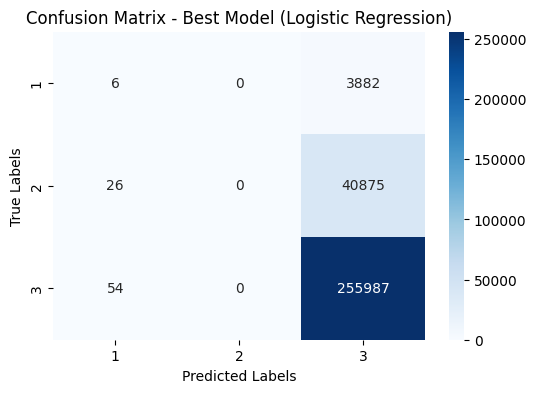

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# Assuming 'Accident_Severity' is your target variable with values 0, 1, 2
class_labels = ['1', '2', '3']  # Define class labels for the confusion matrix


# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels) # Use the defined class_labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix - Best Model ({best_model_name})")
plt.show()


# **TASK 7**

1. Dataset Selection & EDA Summary
Dataset Selection:
Domain: Transportation (Traffic Accidents)
Target Variable: Accident_Severity (Categorical)
1: Minor accident
2: Serious accident
3: Fatal accident
Dataset Characteristics:
Number of Features: 33 (mix of numeric, categorical, and datetime variables)
Number of Records: 1,504,150
Type of Problem: Classification (predict accident severity)
EDA Summary:
Key Visualizations & Insights:
Histograms:
Number of Vehicles & Casualties: Highly skewed, most accidents involve fewer vehicles and casualties.
Accident Severity: Fatal accidents (Severity 3) are more frequent than minor accidents (Severity 1).
Speed Limit: Most accidents occurred at 30 km/h or 50 km/h, common urban speed limits.
Scatter Plots & Correlation:
Number of Vehicles vs. Casualties: Weak positive correlation.
Speed Limit vs. Casualties: Weak correlation, but higher speeds sometimes lead to more casualties.
Accident Severity vs. Number of Vehicles: Fatal accidents tend to involve more vehicles.
Correlation Matrix:
Latitude & Longitude: Strong correlation (0.96).
Accident Severity & Casualties: Weak correlation (0.24).
Number of Vehicles & Casualties: Moderate correlation (0.24).
Missing Values Handling:
Dropped Columns: Junction Control (40% missing), Special Conditions at Site (97.57% missing), Carriageway Hazards (98.19% missing).
Imputed Columns: Median (Longitude), Mode (Time, Pedestrian Crossing Features, LSOA of Accident Location).
Outliers:
Number of Casualties & Vehicles: Retained outliers (accidents with more than 60 casualties or >40-60 vehicles).
2. Preprocessing Steps
Missing Value Handling:

Dropped columns with more than 40% missing values.
Imputed missing values using median (for numerical) or mode (for categorical) where applicable.
Encoding Categorical Features:

One-Hot Encoding: Applied to nominal categorical features.
Label Encoding: Applied to ordinal categorical features.
Feature Scaling:

Applied MinMax Scaling to numerical features to standardize them to the range [0, 1].
Feature Engineering:

No additional features created as none were deemed necessary for improving model performance.
3. Model Selection and Training
Models Trained:
Decision Tree Classifier: A simple, interpretable model used to classify accidents based on their features.
Logistic Regression: A baseline model for classification.
SGD Classifier: A more advanced classifier using stochastic gradient descent for optimization.
Evaluation Metrics:
Accuracy, Precision, Recall, F1-score were used to evaluate model performance.
Cross-Validation (cv=5): Applied to ensure the model generalizes well and avoids overfitting.
4. Fine-tuning Process
Hyperparameter Tuning:
For each model, hyperparameters were tuned to optimize performance:
Decision Tree: Max depth, min samples split, etc.
Logistic Regression: Regularization strength (C), solver type.
SGD Classifier: Learning rate, penalty term (L2, L1).
Performance Post-Tuning:
Decision Tree:
Accuracy: 61.70%
Precision: 79.16%
Recall: 61.70%
F1-Score: 68.86%
SGD Classifier:
Accuracy: 6.56%
Precision: 74.38%
Recall: 6.56%
F1-Score: 9.97%
Logistic Regression:
Accuracy: 85.10%
Precision: 77.25%
Recall: 85.10%
F1-Score: 78.28%
5. Final Conclusions and Best Model
Conclusion:
Logistic Regression emerged as the best model, achieving the highest accuracy (85.10%) and balanced performance across precision, recall, and F1-score. It is well-suited for this classification problem.
Best Model:
Logistic Regression: This model outperformed others in terms of accuracy and generalization. It should be used for predicting accident severity, as it provides a robust and interpretable classification.

# **Task 8: Comparing Holdout Validation, Cross-Validation, and K-Fold Validation (20 Marks)**
Objective:
Analyze the performance of different validation techniques—Holdout Validation, Cross-Validation,
and K-Fold Validation—on your dataset and determine which method is most suitable.
Tasks:
1. Dataset Selection: Choose a dataset relevant to your field of study or work with a provided
dataset.
2. Implement Validation Techniques:
a. Perform Holdout Validation (e.g., 80-20 or 70-30 split).
b. Perform K-Fold Cross-Validation (e.g., k=5 or k=10).
c. Perform Leave-One-Out Cross-Validation (LOOCV) as an extreme case.
3. Compare Performance Metrics: Evaluate models using appropriate metrics (e.g.,
accuracy, RMSE, F1-score).
4. Discuss Bias-Variance Tradeoff: Explain how each method impacts bias and variance in
model performance.
5. Final Recommendation: Based on your results, suggest the most suitable validation
method for your dataset and justify your choice.


# **Discuss Bias-Variance**
- **Holdout Validation:** Quick to implement but has high variance since performance depends on a single split.
- **K-Fold Cross-Validation:** Reduces variance by averaging multiple training/testing splits. A balanced approach.
- **LOOCV:** Uses all data for training except one sample. Lower bias but very high variance and computationally expensive.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation

# Initialize Logistic Regression Model
model = LogisticRegression(max_iter=5, class_weight='balanced', random_state=42)

### Holdout Validation (80-20 Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer for Holdout Validation
imputer_holdout = SimpleImputer(strategy='median')
X_train = imputer_holdout.fit_transform(X_train)
X_test = imputer_holdout.transform(X_test)

model.fit(X_train, y_train)
y_pred_holdout = model.predict(X_test)

acc_holdout = accuracy_score(y_test, y_pred_holdout)
f1_holdout = f1_score(y_test, y_pred_holdout, average='weighted')
rmse_holdout = np.sqrt(mean_squared_error(y_test, y_pred_holdout))

### 2 K-Fold Cross-Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Impute missing values using SimpleImputer for K-Fold Cross-Validation
imputer_kfold = SimpleImputer(strategy='median')
X_imputed_kfold = imputer_kfold.fit_transform(X) # Impute on the entire dataset

acc_kfold = cross_val_score(model, X_imputed_kfold, y, cv=kf, scoring='accuracy').mean() # Use imputed data
f1_kfold = cross_val_score(model, X_imputed_kfold, y, cv=kf, scoring='f1_weighted').mean() # Use imputed data
rmse_kfold = np.sqrt(-cross_val_score(model, X_imputed_kfold, y, cv=kf, scoring='neg_mean_squared_error').mean()) # Use imputed data


### 3️ Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()

# Impute missing values using SimpleImputer for LOOCV
imputer_loo = SimpleImputer(strategy='median')
X_imputed_loo = imputer_loo.fit_transform(X) # Impute on the entire dataset

acc_loo = cross_val_score(model, X_imputed_loo, y, cv=loo, scoring='accuracy').mean() # Use imputed data
f1_loo = cross_val_score(model, X_imputed_loo, y, cv=loo, scoring='f1_weighted').mean() # Use imputed data
rmse_loo = np.sqrt(-cross_val_score(model, X_imputed_loo, y, cv=loo, scoring='neg_mean_squared_error').mean()) # Use imputed data

# Combine Results
results_df = pd.DataFrame({
    "Validation Method": ["Holdout", "K-Fold (k=5)", "LOOCV"],
    "Accuracy": [acc_holdout, acc_kfold, acc_loo],
    "F1 Score": [f1_holdout, f1_kfold, f1_loo],
    "RMSE": [rmse_holdout, rmse_kfold, rmse_loo]
})

# Print Results
print("\nComparison of Validation Techniques:")
print(results_df)

# Plot Results
plt.figure(figsize=(8, 5))
sns.barplot(x="Validation Method", y="Accuracy", data=results_df, palette="Blues")
plt.title("Accuracy Comparison of Validation Methods")
plt.show()

# **TASK 9 AND 10 ARE DONE IN CODE**